<a href="https://colab.research.google.com/github/RhysWangJunfei/DataVisualization/blob/master/fre_boundary_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
from google.colab import files
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as gbdt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def sliding_window_transformation(dataset, window_size=10):
  '''
  A function to transform time-series data into tabular by sliding window
  Args:
    dataset: the target time-series data.
    window_size: default size=10
  Returns: the tansformed tabular data
  '''
  dataX = []
  for i in range(len(dataset)-window_size+1):
      a = dataset[i:(i+window_size)]
      dataX.append(a)
  return np.array(dataX)

In [0]:
'''Load data'''
WHE_data = pd.read_csv('/content/drive/My Drive/MEng/UWO/nilm_dataset/Electricity_WHE.csv')[['unix_ts','P']]
APP_data = pd.read_csv('/content/drive/My Drive/MEng/UWO/nilm_dataset/Electricity_FRE.csv')['P']

In [4]:
window_size=60
whe_tab_data = sliding_window_transformation(WHE_data['P'].as_matrix(), window_size)

app_Y = APP_data[window_size-1:].values.reshape([APP_data.shape[0]-window_size+1,1])

app_Y_new = np.ones(app_Y.shape)
app_Y_new[[np.where(app_Y<210)[0]],:]=0
app_Y_new = app_Y_new.flatten()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
df = pd.Series(app_Y_new)
df.value_counts()

0.0    1042514
1.0       8627
dtype: int64

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
conponent = pca.fit_transform(whe_tab_data)
new_data = np.concatenate([conponent,app_Y_new.reshape([-1,1])],axis=1)
principalDf = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','target'])
principalDf.head()

,principal component 1,principal component 2,target
0,4382.820582,-2581.285811,0.0
1,4307.982822,-3061.436957,0.0
2,4228.375613,-3528.738461,0.0
3,4147.042546,-3986.431718,0.0
4,4046.824877,-4445.400688,0.0


In [7]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/MEsc/Mia/dwe/fre_prob_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


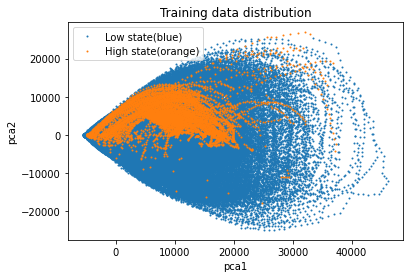

In [8]:
#visualization
groups = principalDf.groupby('target')
fig = plt.figure() 
ax = fig.add_subplot()

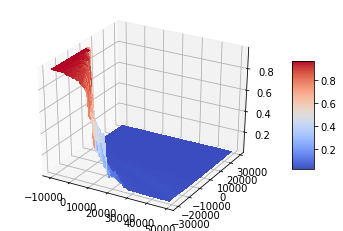

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10000, 50000, 1000)
Y = np.arange(-30000, 30000, 1000)
xx, yy = np.meshgrid(X, Y)
Xfull = np.c_[xx.ravel(), yy.ravel()]
prob_mat = np.zeros(Xfull.shape[0])
for i in range (Xfull.shape[0]):  
  original_signal = pca.inverse_transform(Xfull[i,:])
  prob = model.predict_proba(original_signal.reshape([-1,60]))
  prob_mat[i] = prob[0,0]
prob_new = prob_mat.reshape([60,60])

surf = ax.plot_surface(xx, yy, prob_new, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [14]:
prob_new

array([[0.02726914, 0.04917964, 0.4130663 , 0.87740201, 0.96424806,
        0.96916109],
       [0.02766007, 0.11945074, 0.88379216, 0.96971691, 0.97133541,
        0.96375233],
       [0.02743804, 0.66559368, 0.96965146, 0.96931183, 0.97287601,
        0.97315246],
       [0.02857807, 0.97679275, 0.97694302, 0.97694302, 0.97632784,
        0.97632784],
       [0.97100449, 0.97720909, 0.976385  , 0.97682971, 0.97649789,
        0.97581226],
       [0.9757942 , 0.97684413, 0.97645915, 0.97576481, 0.97682512,
        0.9763    ]])

In [0]:
import pylab as p
p.show()